In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
import os 

In [4]:
path = os.getcwd()
print(path)
os.chdir("C:/Users/USER/Downloads/Data Bank")
print(os.getcwd())

C:\Users\USER
C:\Users\USER\Downloads\Data Bank


In [5]:
#import Dataset
Df=pd.read_csv('C:/Users/USER/Downloads/Data Bank/fixtures.csv', sep=',',encoding='latin-1')
Df.head(20)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,B1,08/03/2024,19:45,Mechelen,Westerlo,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,09/03/2024,15:00,Kortrijk,Antwerp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,09/03/2024,17:15,Charleroi,Cercle Brugge,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,09/03/2024,19:45,RWD Molenbeek,Anderlecht,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,10/03/2024,12:30,Genk,Standard,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,B1,10/03/2024,15:00,Club Brugge,Oud-Heverlee Leuven,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,B1,10/03/2024,17:30,St. Gilloise,Gent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,B1,10/03/2024,18:15,Eupen,St Truiden,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,D1,08/03/2024,19:30,Stuttgart,Union Berlin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,D1,09/03/2024,14:30,Augsburg,Heidenheim,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Df.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 93, dtype: object

In [7]:
Df.shape

(187, 93)

In [8]:
Df.isnull().sum()

Div           0
Date          0
Time          0
HomeTeam      0
AwayTeam      0
           ... 
PCAHA       187
MaxCAHH     187
MaxCAHA     187
AvgCAHH     187
AvgCAHA     187
Length: 93, dtype: int64

In [10]:
columns_with_nan = [
    'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
    'IWH', 'IWD', 'IWA',
    'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 
    'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 
    'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 
    'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 
    'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 
    'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 
    'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 
    'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA'
]

# Drop columns with NaN values
Df.drop(columns_with_nan, axis=1, inplace=True)

In [13]:
Df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
       'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5',
       'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA',
       'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA'],
      dtype='object')

In [15]:
bookmakers = [ 'B365H', 'B365D','B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5',
'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA',
'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA']  # Adjust as per your dataset

# Calculate average odds for each bookmaker
average_odds = Df[bookmakers].mean()
average_odds

B365H       2.477647
B365D       3.961230
B365A       4.204492
BWH         2.449947
BWD         3.905401
BWA         4.182086
PSH         2.575615
PSD         4.086738
PSA         4.457433
WHH         2.473062
WHD         3.999375
WHA         4.376125
VCH         2.492151
VCD         3.820054
VCA         4.246989
MaxH        2.624225
MaxD        4.206150
MaxA        4.776578
AvgH        2.499091
AvgD        3.950053
AvgA        4.296845
B365>2.5    1.904759
B365<2.5    2.023048
P>2.5       1.947258
P<2.5       2.043011
Max>2.5     1.965508
Max<2.5     2.098449
Avg>2.5     1.895027
Avg<2.5     2.023048
AHh        -0.352941
B365AHH     1.937968
B365AHA     1.937380
PAHH        1.951711
PAHA        1.941497
MaxAHH      1.975508
MaxAHA      1.970695
AvgAHH      1.911551
AvgAHA      1.906578
dtype: float64

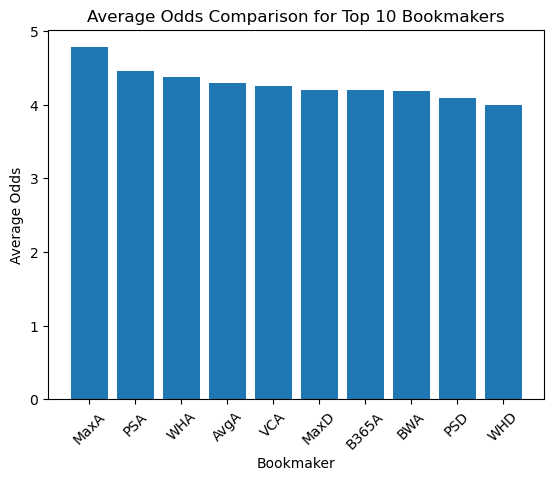

In [17]:
top_10_bookmakers = average_odds.sort_values(ascending=False).head(10)

# Plotting the average odds for top 10 bookmakers
plt.bar(top_10_bookmakers.index, top_10_bookmakers.values)
plt.xlabel('Bookmaker')
plt.ylabel('Average Odds')
plt.title('Average Odds Comparison for Top 10 Bookmakers')
plt.xticks(rotation=45)
plt.show()

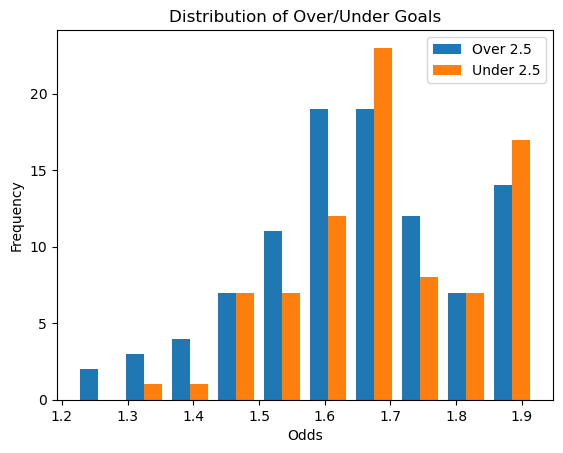

In [19]:
over_matches = Df[Df['B365>2.5'] < Df['B365<2.5']]
under_matches = Df[Df['B365>2.5'] > Df['B365<2.5']]

#  Visualize the distribution of matches
import matplotlib.pyplot as plt

# Plot the distribution of matches with Over/Under goals
plt.hist([over_matches['B365>2.5'], under_matches['B365<2.5']], bins=10, label=['Over 2.5', 'Under 2.5'])
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.title('Distribution of Over/Under Goals')
plt.legend()
plt.show()


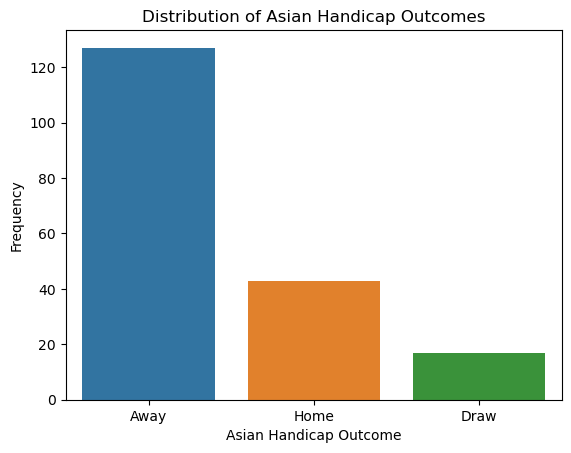

In [24]:
# Asian Handicap Analysis

#Calculate the outcome of Asian Handicap bets
# Assuming 'AHh', 'B365AHH', and 'B365AHA' are columns representing Asian Handicap odds
# Example calculation: If AHh > 0, Home team is favored. If AHh < 0, Away team is favored.
Df['AH_outcome'] = Df.apply(lambda x: 'Home' if x['AHh'] > 0 else 'Away' if x['AHh'] < 0 else 'Draw', axis=1)

# Visualize the distribution of outcomes
import seaborn as sns

# Plot the distribution of Asian Handicap outcomes
sns.countplot(data=Df, x='AH_outcome')
plt.xlabel('Asian Handicap Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Asian Handicap Outcomes')
plt.show()

In [44]:
selected_columns = [
    'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
    'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA',
    'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA',
    'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
    'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam'
]

selected_df = Df[selected_columns]


In [43]:
all_odds = pd.concat([Df['B365H'], Df['B365D'], Df['B365A']])

# Find the maximum odd
max_odd = all_odds.max()

print("The highest odd out of all the matches is:", max_odd)

The highest odd out of all the matches is: 29.0


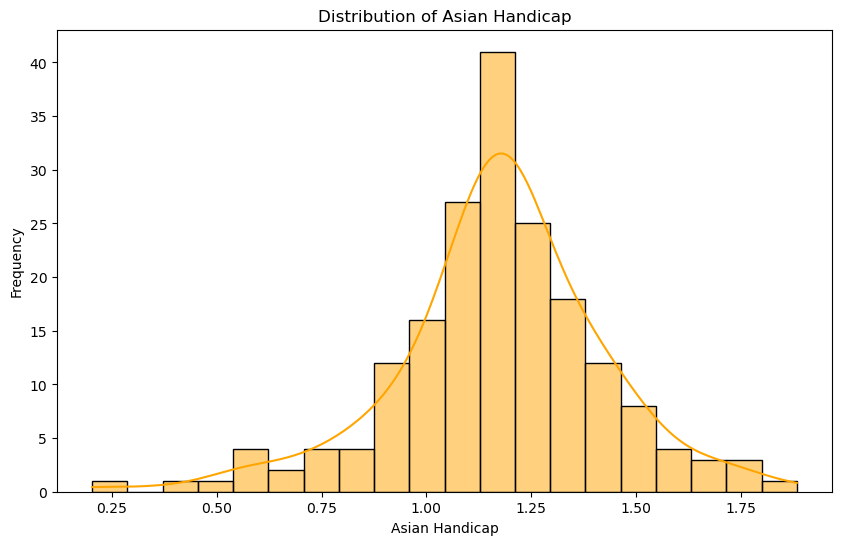

In [47]:
selected_df['Avg_AH'] = selected_df[['AHh', 'B365AHH', 'B365AHA']].mean(axis=1)

# Plot distribution of Asian Handicap
plt.figure(figsize=(10, 6))
sns.histplot(selected_df['Avg_AH'], bins=20, kde=True, color='orange')
plt.xlabel('Asian Handicap')
plt.ylabel('Frequency')
plt.title('Distribution of Asian Handicap')
plt.show()

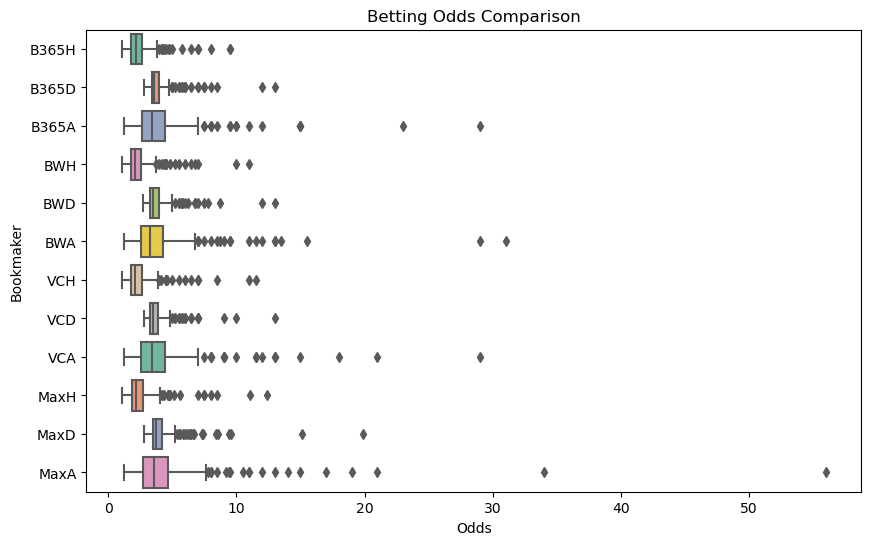

In [48]:
odds_comparison_df = selected_df[['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 
                                  'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA']]

# Plot betting odds comparison using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=odds_comparison_df, orient='h', palette='Set2')
plt.xlabel('Odds')
plt.ylabel('Bookmaker')
plt.title('Betting Odds Comparison')
plt.show()

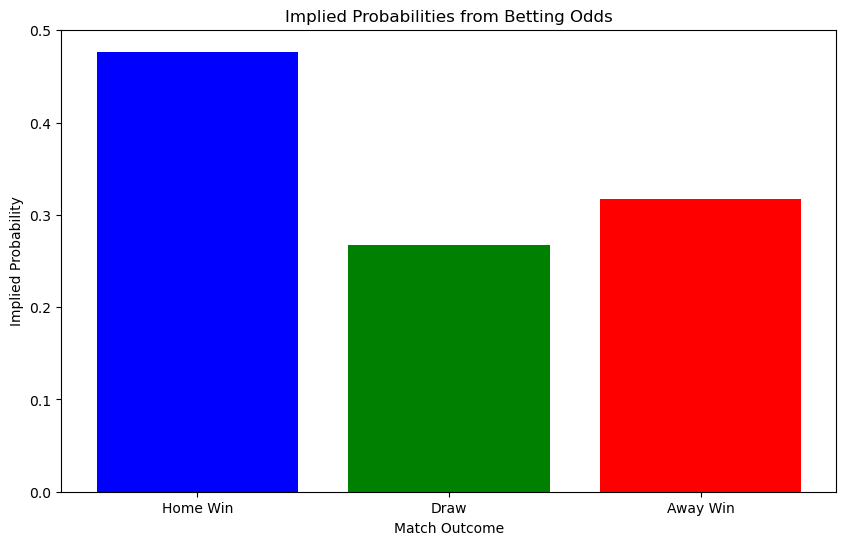

In [49]:
selected_df['Home_Probability'] = 1 / selected_df['B365H']
selected_df['Draw_Probability'] = 1 / selected_df['B365D']
selected_df['Away_Probability'] = 1 / selected_df['B365A']

# Plot implied probabilities
plt.figure(figsize=(10, 6))
plt.bar(['Home Win', 'Draw', 'Away Win'], 
        [selected_df['Home_Probability'].mean(), 
         selected_df['Draw_Probability'].mean(), 
         selected_df['Away_Probability'].mean()], 
        color=['blue', 'green', 'red'])
plt.xlabel('Match Outcome')
plt.ylabel('Implied Probability')
plt.title('Implied Probabilities from Betting Odds')
plt.show()

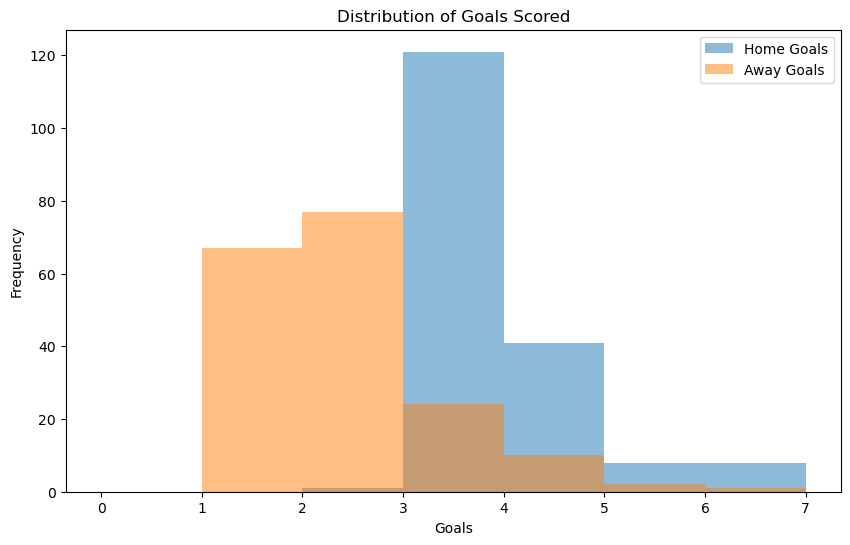

In [51]:
selected_df['Avg_Home_Goals'] = selected_df['MaxD'].mean()
selected_df['Avg_Away_Goals'] = selected_df['MaxH'].mean()

# Plot distribution of goals scored
plt.figure(figsize=(10, 6))
plt.hist(selected_df['MaxD'], bins=range(8), alpha=0.5, label='Home Goals')
plt.hist(selected_df['MaxH'], bins=range(8), alpha=0.5, label='Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored')
plt.legend()
plt.show()

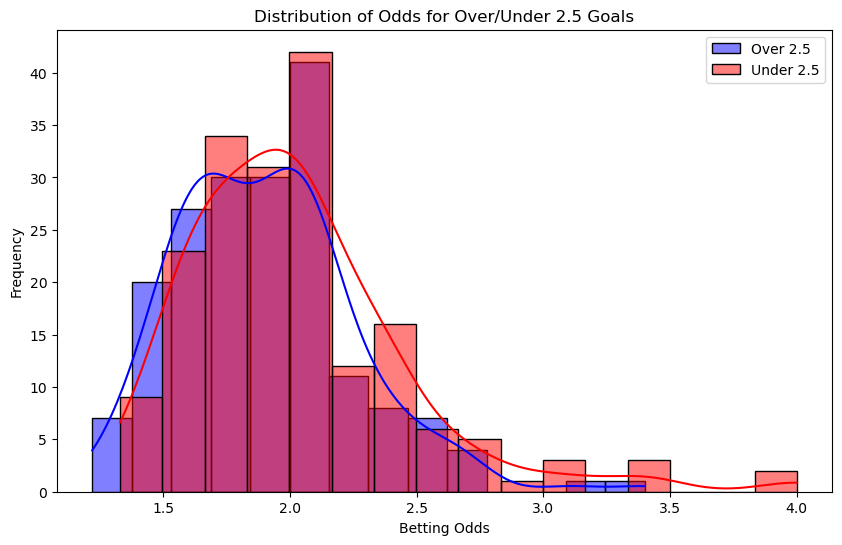

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(selected_df['B365>2.5'], kde=True, color='blue', label='Over 2.5')
sns.histplot(selected_df['B365<2.5'], kde=True, color='red', label='Under 2.5')
plt.xlabel('Betting Odds')
plt.ylabel('Frequency')
plt.title('Distribution of Odds for Over/Under 2.5 Goals')
plt.legend()
plt.show()